In [1]:
#2021.07.02. FRI
#Hankyeong 

##CH06. etri의 AI API
#00. 패키지 호출
import warnings
import pandas as pd 
import matplotlib.pyplot as plt 
import urllib3
import json
import base64
import os
from PIL import Image, ImageDraw, ImageFont

#00-1. warning message ignore
warnings.filterwarnings('ignore')

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline
plt.rcParams["axes.unicode_minus"]=False
plt.rcParams["font.family"] = 'D2Coding'


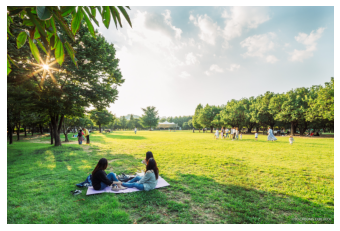

In [2]:
#01. 
with open('../../key/etri_key.txt') as key_file :
    etri_key = key_file.read()

#02. 
#(1) 
img_file = '../../data/image/park.jpg'

#(2)
image = Image.open(img_file)
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
#(3)  
img_type = os.path.splitext(img_file)[1]
img_type = img_type.replace('.','')
img_type

'jpg'

In [4]:
#03. 
with open(img_file,'rb') as file :
    img_contents = base64.b64encode(file.read()).decode("utf8")

#04.
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

#05.
#(1)
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

#(2) 
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

#06. 
print("[responseCode] " + str(response.status))
print("[responBody]")
result = json.loads(response.data)
result

[responseCode] 200
[responBody]


{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.993701',
    'x': '416',
    'y': '568',
    'width': '190',
    'height': '160'},
   {'class': 'person',
    'confidence': '0.958099',
    'x': '321',
    'y': '592',
    'width': '132',
    'height': '130'},
   {'class': 'person',
    'confidence': '0.956546',
    'x': '968',
    'y': '488',
    'width': '16',
    'height': '41'},
   {'class': 'person',
    'confidence': '0.954333',
    'x': '1100',
    'y': '506',
    'width': '24',
    'height': '38'},
   {'class': 'person',
    'confidence': '0.907414',
    'x': '496',
    'y': '472',
    'width': '12',
    'height': '30'},
   {'class': 'person',
    'confidence': '0.894190',
    'x': '303',
    'y': '478',
    'width': '23',
    'height': '63'},
   {'class': 'person',
    'confidence': '0.695921',
    'x': '809',
    'y': '481',
    'width': '18',
    'height': '43'},
   {'class': 'person',
    'confidence': '0.645447',
    'x': '273',
    'y': '47

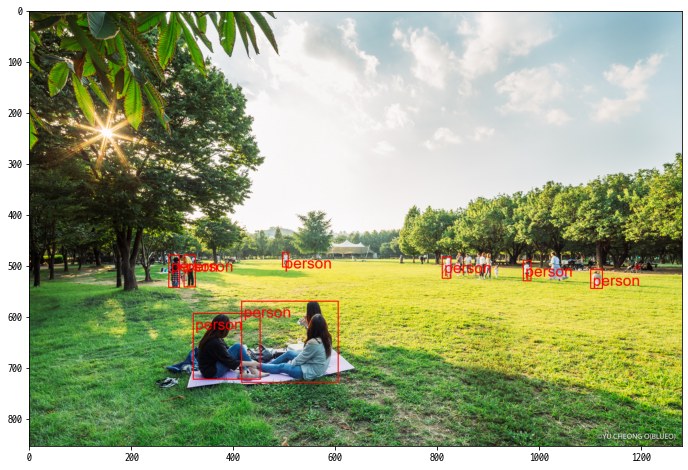

In [5]:
#07. 
image = Image.open(img_file)
draw = ImageDraw.Draw(image)
obj_list = result['return_object']['data']
for obj in obj_list : 
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+5,y+5), name, font=ImageFont.truetype('arial.ttf',30), fill=(255,0,0))
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.show()